multiple targets and output learning

In [1]:
import numpy as np

s1 = np.random.uniform(0,10, 1000)
s2 = np.random.uniform(0,10, 1000)

s3 = np.random.uniform(0,10, 1000)
s4 = np.random.uniform(0,10, 1000)


In [2]:
input = []
output1 = []
output2 = []
output3 = []
for i,j,k,l in zip(s1, s2, s3, s4):
    ii = int(i)
    jj = int(j)
    kk = int(k)
    ll = int(l) 
    x1 = ii*10.+jj
    x2 = kk*10.+ll
    
    y1=x1+ x2 # 목적 : 덧셈 학습
    #print(y1)
    yy = [  int((y1/100)%10), int((y1/10)%10), int(y1%10) ]
    input.append([ii,jj,kk,ll])
    
    output1.append( [int((y1/100)%10)] )
    output2.append( [int((y1/10)%10)] )
    output3.append( [int((y1)%10)] )
    
    print(str(x1)+"+"+str(x2)+" = "+str(y1)+" ; "+str(yy))
    
    

85.0+41.0 = 126.0 ; [1, 2, 6]
40.0+78.0 = 118.0 ; [1, 1, 8]
29.0+83.0 = 112.0 ; [1, 1, 2]
98.0+92.0 = 190.0 ; [1, 9, 0]
63.0+9.0 = 72.0 ; [0, 7, 2]
97.0+41.0 = 138.0 ; [1, 3, 8]
11.0+78.0 = 89.0 ; [0, 8, 9]
57.0+24.0 = 81.0 ; [0, 8, 1]
87.0+41.0 = 128.0 ; [1, 2, 8]
14.0+69.0 = 83.0 ; [0, 8, 3]
83.0+5.0 = 88.0 ; [0, 8, 8]
45.0+72.0 = 117.0 ; [1, 1, 7]
41.0+23.0 = 64.0 ; [0, 6, 4]
51.0+20.0 = 71.0 ; [0, 7, 1]
9.0+81.0 = 90.0 ; [0, 9, 0]
90.0+9.0 = 99.0 ; [0, 9, 9]
58.0+85.0 = 143.0 ; [1, 4, 3]
17.0+86.0 = 103.0 ; [1, 0, 3]
36.0+73.0 = 109.0 ; [1, 0, 9]
79.0+98.0 = 177.0 ; [1, 7, 7]
89.0+78.0 = 167.0 ; [1, 6, 7]
0.0+7.0 = 7.0 ; [0, 0, 7]
69.0+29.0 = 98.0 ; [0, 9, 8]
0.0+77.0 = 77.0 ; [0, 7, 7]
75.0+96.0 = 171.0 ; [1, 7, 1]
56.0+91.0 = 147.0 ; [1, 4, 7]
77.0+30.0 = 107.0 ; [1, 0, 7]
53.0+73.0 = 126.0 ; [1, 2, 6]
59.0+52.0 = 111.0 ; [1, 1, 1]
35.0+47.0 = 82.0 ; [0, 8, 2]
54.0+78.0 = 132.0 ; [1, 3, 2]
55.0+24.0 = 79.0 ; [0, 7, 9]
68.0+70.0 = 138.0 ; [1, 3, 8]
24.0+46.0 = 70.0 ; [0, 7, 0]
57.

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable



x_data = Variable(torch.Tensor(input))
y_data1 = Variable(torch.Tensor(output1))
y_data2 = Variable(torch.Tensor(output2))
y_data3 = Variable(torch.Tensor(output3))


class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(4, 8)
        self.l2 = nn.Linear(8, 32)
        
        self.l31 = nn.Linear(32, 4)
        self.l32 = nn.Linear(32, 4)
        self.l33 = nn.Linear(32, 4)
        
        self.lo1 = nn.Linear(4, 1)
        self.lo2 = nn.Linear(4, 1)
        self.lo3 = nn.Linear(4, 1)        

    def forward(self, x):
        #x = x.view(-1, 4)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x1 = F.relu(self.l31(x))
        x2 = F.relu(self.l32(x))        
        x3 = F.relu(self.l33(x))
        
        return self.lo1(x1), self.lo2(x2), self.lo3(x3)
    

model = Model()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses1 =[]
losses2 =[]
losses3 =[]

for epoch in range(5000):
    y_pred1, y_pred2, y_pred3 = model(x_data)

    loss1 = criterion(y_pred1, y_data1)
    loss2 = criterion(y_pred2, y_data2)
    loss3 = criterion(y_pred3, y_data3)
    
    optimizer.zero_grad()
    if epoch%4 ==0:   loss1.backward()
    if epoch%4 ==1:   loss2.backward()
    if epoch%4 ==2:   loss3.backward()        
    
    ls1 =loss1.data[0]
    ls2 =loss2.data[0]
    ls3 =loss3.data[0]
    if epoch%4 ==3:
        if ls1>ls2 and ls1>ls3:   loss1.backward()
        if ls2>ls1 and ls2>ls3:   loss2.backward()
        if ls3>ls1 and ls3>ls2:   loss3.backward()  
    losses1.append(ls1)
    losses2.append(ls2)
    losses3.append(ls3)
        
    if epoch%100==0:
        print("epoch: {}, {:.6f},{:.6f},{:.6f} ".format(epoch, loss1.data[0], loss2.data[0], loss3.data[0]))    
    
    optimizer.step()


#or param in model.parameters():
#   print(param.data)



epoch: 0, 1158.163696,26894.845703,25236.285156 
epoch: 100, 240.109451,14772.035156,14727.697266 
epoch: 200, 112.882568,9391.499023,8954.665039 
epoch: 300, 117.731102,9159.610352,8651.534180 
epoch: 400, 117.696007,8971.431641,8368.563477 
epoch: 500, 109.020935,8798.675781,8090.854004 
epoch: 600, 100.093369,8592.105469,7834.536621 
epoch: 700, 89.911774,8359.545898,7591.929199 
epoch: 800, 79.239548,8038.777832,7345.679199 
epoch: 900, 71.692299,7577.833984,7098.826660 
epoch: 1000, 66.730637,7091.656250,6815.355957 
epoch: 1100, 61.450451,6594.751465,6560.995117 
epoch: 1200, 57.225758,6104.355469,6113.109375 
epoch: 1300, 49.033920,5332.323242,5340.796387 
epoch: 1400, 42.547886,4644.792480,4645.523926 
epoch: 1500, 36.576382,3904.496582,3907.945557 
epoch: 1600, 30.089260,3110.895264,3108.088623 
epoch: 1700, 24.131952,2407.485596,2406.726807 
epoch: 1800, 19.710369,1886.595703,1867.086060 
epoch: 1900, 16.926289,1506.750244,1502.198364 
epoch: 2000, 14.403193,1217.199829,1205.

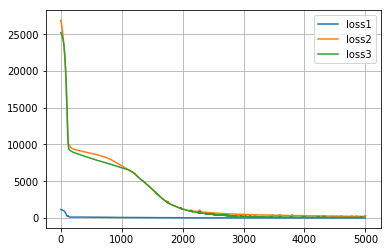

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  



fig, ax = plt.subplots()
ax.plot(losses1, label='loss1')
ax.plot(losses2, label='loss2')
ax.plot(losses3, label='loss3')
ax.grid()
plt.legend()

plt.show()

In [7]:

#one test sample
test1 = Variable(torch.Tensor([[1,2,3,4]])) # for 12+34
y_pred1, y_pred2, y_pred3 = model(test1)
Y_pred = round( model(test1)[0].data[0][0])*100+round( model(test1)[1].data[0][0])*10+round( model(test1)[2].data[0][0])

print("12 + 34 = ",  Y_pred )

12 + 34 =  46


In [6]:
test2 = Variable(torch.Tensor([[8,7,6,2]])) 
y_pred1, y_pred2, y_pred3 = model(test2)
Y_pred = round( model(test2)[0].data[0][0])*100+round( model(test2)[1].data[0][0])*10+round( model(test2)[2].data[0][0])

print("87 + 62 = ",  Y_pred )


87 + 62 =  149
